# [프로젝트] 요소수 유통 주유소 재고 현황 데이터 분석

---

## 프로젝트 목표
---
- 요소수 유통 주유소 재고 현황 데이터를 살펴보고 유의미한 데이터를 불러옵니다.
- 데이터를 지도에 표출하여 요소수 재고 현황을 조회할 수 있는 서비스를 제작합니다.

## 프로젝트 목차
---
1. **데이터 불러오기:** csv 데이터를 불러온 후 Dataframe 구조를 확인합니다.
2. **데이터 전처리하기:** 유의미한 데이터를 제공하기 위해 데이터를 전처리합니다.
3. **데이터 분석하기:** 다양한 방법으로 데이터를 파헤치고 통계해봅니다.
4. **데이터 시각화하기:** 지도에 데이터를 표출하여 요소수 재고 현황 조회 서비스를 제공합니다.

## 프로젝트 개요
---
현재 사회적 문제로 대두되고 있는 요소수 문제를 극복하기 위해 공공데이터 포털에서 요소수 유통 주유소 재고현황을 제공하고 있습니다.

본 실습을 통해 요소수 재고 현황 데이터를 지도에 표출하여 유의미한 데이터를 제공하는 서비스를 구축해봅니다.

**데이터 출처:** https://www.data.go.kr/index.do

---

## 1. 데이터 불러오기

pandas Dataframe 형태로 요소수 재고 현황 데이터를 불러들입니다.

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("./Urea data.csv")
df

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,NaN,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,NaN,2000,2021-12-28 06:06:12,031-215-8053
2,충남 부여군 내산면 서천공주고속도로 26,A0000052,GRAY,0,36.258064,126.800203,부여백제(공주)주유/충전소,NaN,1500,2021-12-28 11:11:38,041-833-8300
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,NaN,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,NaN,1000,2021-12-28 13:56:33,041-854-9504
...,...,...,...,...,...,...,...,...,...,...,...
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,NaN,1500,2021-12-28 12:02:05,032-575-5261
196,인천 서구 봉수대로 1543 (금곡동),A0008107,YELLOW,972,37.609760,126.643827,(주)디오티디 인천랍스터주유소,NaN,2000,2021-12-28 11:19:25,032-567-5185
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,NaN,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,"08:00~20:00(평일), 08:00~16:00(토)일요일휴무",1500,2021-12-28 11:13:41,031-461-8005


불러온 데이터를 살펴보면 200개의 요소수 유통 주유소에 대한 11개의 정보가 있습니다.

각 컬럼은 왼쪽부터 `주소`, `주유소 코드`, `재고 레벨`, `재고`, `위도`, `경도`, `영업시간`, `가격`, `업데이트 일시`, 그리고 `전화번호`에 대한 정보를 가지고 있습니다.

---

## 2. 데이터 전처리하기

다음으로 데이터에 결측치(missing data)가 있는지 확인하고, 데이터 정제 과정을 수행해 봅시다.

In [2]:
df.info() # 데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addr       200 non-null    object 
 1   code       200 non-null    object 
 2   color      200 non-null    object 
 3   inventory  200 non-null    int64  
 4   lat        200 non-null    float64
 5   lng        200 non-null    float64
 6   name       200 non-null    object 
 7   openTime   13 non-null     object 
 8   price      200 non-null    int64  
 9   regDt      200 non-null    object 
 10  tel        200 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.3+ KB


데이터 구조를 살펴보면 `영업시간` 대한 정보에 결측치가 있는 것을 알 수 있습니다. 이는 `영업시간`에 대한 정보가 존재하지 않는 다는 것을 의미합니다.

비어있는 열에서는 유의미한 정보를 얻을 수 없기 때문에 `df.drop()`을 사용하여 해당 데이터를 삭제합니다.

In [3]:
df = df.drop('openTime', axis=1)
df

,addr,code,color,inventory,lat,lng,name,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,2000,2021-12-28 06:06:12,031-215-8053
2,충남 부여군 내산면 서천공주고속도로 26,A0000052,GRAY,0,36.258064,126.800203,부여백제(공주)주유/충전소,1500,2021-12-28 11:11:38,041-833-8300
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,1000,2021-12-28 13:56:33,041-854-9504
...,...,...,...,...,...,...,...,...,...,...
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,1500,2021-12-28 12:02:05,032-575-5261
196,인천 서구 봉수대로 1543 (금곡동),A0008107,YELLOW,972,37.609760,126.643827,(주)디오티디 인천랍스터주유소,2000,2021-12-28 11:19:25,032-567-5185
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,1500,2021-12-28 11:13:41,031-461-8005


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addr       200 non-null    object 
 1   code       200 non-null    object 
 2   color      200 non-null    object 
 3   inventory  200 non-null    int64  
 4   lat        200 non-null    float64
 5   lng        200 non-null    float64
 6   name       200 non-null    object 
 7   openTime   13 non-null     object 
 8   price      200 non-null    int64  
 9   regDt      200 non-null    object 
 10  tel        200 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.3+ KB


이제 `영업시간` 데이터가 삭제된 것을 확인할 수 있습니다.

---

다음으로 가격(`price`)이나 재고(`inventory`)에 문제가 있는지 확인해 봅시다.

In [3]:
df.describe()

,inventory,lat,lng,price
count,200.000000,200.000000,200.000000,200.000000
mean,1371.315000,37.225830,127.082005,1738.500000
std,1038.210741,0.447606,0.388876,350.545519
min,0.000000,34.595037,126.575722,1000.000000
25%,700.000000,37.077245,126.809875,1500.000000
50%,1181.000000,37.246144,127.055689,1800.000000
75%,1762.000000,37.451485,127.258748,2000.000000
max,6900.000000,38.189376,129.366307,3000.000000


요소수 가격은 1000원에서 3000원 사이에 꽤 고르게 분포하고 있는 것을 알 수 있습니다. <br>
이 경우에 별다른 이상치는 없는 것으로 보이므로, 본격적인 분석 단계로 넘어가겠습니다.

## 3. 데이터 분석하기

`matplotlib`과 `seaborn` 라이브러리를 이용하여 데이터 통계를 해봅시다.

In [6]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1. 지역별 요소수 유통 주유소 분포 알아보기

먼저 `전화번호` 정보를 활용하여 지역별 요소수 유통 주유소의 분포를 알아봅시다.

국내 지역번호 리스트를 생성하고 `전화번호` 데이터를 기반으로 각 지역의 요소수 유통 주유소의 수를 알아봅시다.

In [4]:
# 국내 지역번호 리스트 생성
list_tel = ['02', '031', '032', '033', '041', '042', '043', '044', '051', '052', '053', '054', '055', '061', '062', '063', '064']

# 지역번호를 바탕으로 지역 별 유통 주유소의 수를 센다.
df_region_by_tel = pd.Series(np.zeros(len(list_tel), dtype=np.int64), index=list_tel)

# 지역별 요소수 유통 주유소 수 세기
for i in list_tel:
    df_region_by_tel[i] = df['tel'].str.startswith(i).sum()

df_region_by_tel.sort_values(ascending=False)

031    148
032     28
041     10
02       3
063      3
043      3
054      2
061      1
051      1
033      1
052      0
053      0
044      0
055      0
042      0
062      0
064      0
dtype: int64

`전화번호` 정보를 살펴보았을 때 대부분의 요소수 유통 주유소는 수도권, 특히 경기도에 밀집되어 있으며 지방에서는 찾기 힘든 것을 확인할 수 있습니다.

추가적으로 주소 (`addr`)을 이용해서도 유사한 분석을 진행해보겠습니다.

In [5]:
df.head(2)

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,NaN,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,NaN,2000,2021-12-28 06:06:12,031-215-8053


In [6]:
# 문자열을 입력받아 첫번째 단어를 추출하는 간단한 보조함수를 먼저 정의합니다.
def extract(string):
    return string.split()[0] # 띄어쓰기를 기준으로 'split'

In [7]:
addrs = df['addr'].apply(lambda x: x.split()[0])
addrs

0      경기
1      경기
2      충남
3      충남
4      충남
       ..
195    인천
196    인천
197    경기
198    경기
199    경기
Name: addr, Length: 200, dtype: object

In [8]:
addrs_cnt = addrs.value_counts().sort_values(ascending=False)
addrs_cnt

addr
경기       144
인천        25
충남        10
경기도        6
전북         3
충북         3
경북         2
평택시        2
부산         1
서울         1
인천광역시      1
강원         1
전남         1
Name: count, dtype: int64

In [9]:
addrs_cnt_df = pd.DataFrame(addrs_cnt)
addrs_cnt_df

,count
addr,
경기,144
인천,25
충남,10
경기도,6
전북,3
충북,3
경북,2
평택시,2
부산,1


`인천`과 `인천광역시`가 데이터 수집 과정에서의 오류로 중복 기재되었으므로, 손으로 직접 처리해줍니다. <br>
`경기도`와 `경기`, `평택시`도 비슷한 방법으로 진행해줍니다.

In [19]:
# 두 row의 인덱스 값을 입력받아, 첫번째 인덱스로 병합하는 간단한 보조함수를 정의합니다.
def merge_rows(df, rowA, rowB):
    cnt = df.loc[rowB]
    df.loc[rowA] += cnt
    df = df.drop(rowB)
    return df

In [20]:
addrs_cnt_df = merge_rows(addrs_cnt_df, '인천', '인천광역시')
addrs_cnt_df = merge_rows(addrs_cnt_df, '경기', '경기도')
addrs_cnt_df = merge_rows(addrs_cnt_df, '경기', '평택시')
addrs_cnt_df

,count
addr,
경기,152
인천,26
충남,10
전북,3
충북,3
경북,2
부산,1
서울,1
강원,1


---

### 3-2. 요소수 재고 레벨 분포 알아보기

전국의 요소수 `재고량`의 분포를 `histogram`을 통해 알아봅시다.

Text(0, 0.5, 'count')

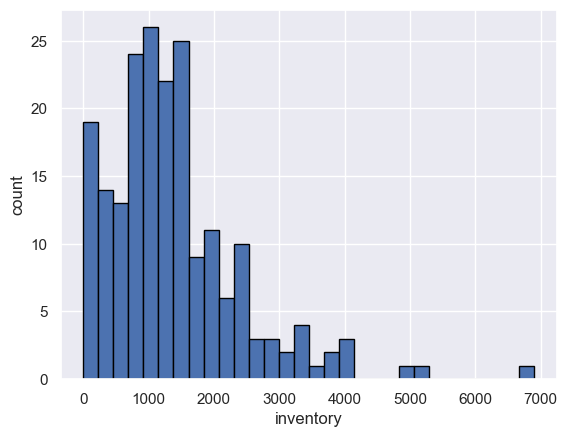

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

fig, ax = plt.subplots()
ax.hist(df['inventory'], bins=30, edgecolor='black')
ax.set_xlabel('inventory')
ax.set_ylabel('count')

위의 `histogram`을 살펴보면 `재고량`이 왼쪽에 많이 분포되어 있는 것을 확인할 수 있습니다.

`재고량` 데이터를 `boxplot`으로도 확인해 보고, 평균 `재고량`도 계산해 봅시다.

요소수 재고량의 평균은 1371.315개입니다.


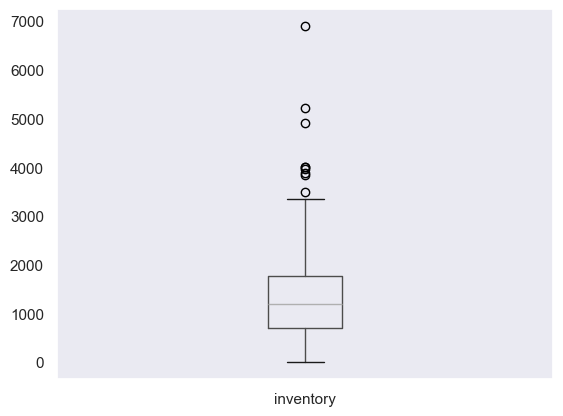

In [16]:
df.boxplot(column='inventory', grid=False) # boxplot 생성

inven_mean = df['inventory'].mean() # 평균값 계산
print(f"요소수 재고량의 평균은 {inven_mean}개입니다.") # 문자열 포맷팅

요소수의 평균 재고량은 `1371.315`입니다.

위의 두 그래프만 봤을 때는 요소수 재고가 부족한 것처럼 보입니다. 요소수 `재고 레벨`을 막대그래프로 그려보고 재고 현황을 좀 더 파헤쳐 봅시다.

In [17]:
df.head(3)

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,NaN,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,NaN,2000,2021-12-28 06:06:12,031-215-8053
2,충남 부여군 내산면 서천공주고속도로 26,A0000052,GRAY,0,36.258064,126.800203,부여백제(공주)주유/충전소,NaN,1500,2021-12-28 11:11:38,041-833-8300


/var/folders/hd/x78brj1j2zn2msbqhqqp8qs00000gn/T/ipykernel_10801/1659215254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='color', data=df, palette=['#8FBC8B', '#F0E68C', '#FA8072', '#C0C0C0'], order=['GREEN', 'YELLOW', 'RED', 'GRAY'])


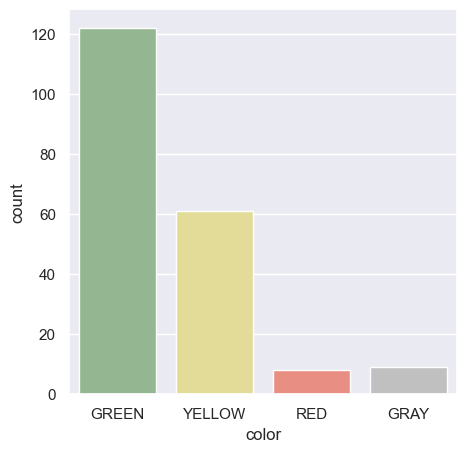

In [18]:
plt.figure(figsize=(5,5))

ax = sns.countplot(x='color', data=df, palette=['#8FBC8B', '#F0E68C', '#FA8072', '#C0C0C0'], order=['GREEN', 'YELLOW', 'RED', 'GRAY'])

`GREEN`은 여유, `YELLOW`는 보통, `RED`는 부족, `GRAY`는 품절은 의미합니다.

위의 그래프를 보았을 때는 요소수 재고가 여유있는 것을 알 수 있습니다. 실제로 `재고량`이 `1000` 이상이면 `GREEN`으로 분류되기 때문에 요소수 재고는 여유있는 것입니다.

---

### 3-3. 요소수 가격 분포 알아보기

앞서 사용한 방법과 마찬가지로 `histogram`을 통해 요소수 `가격`의 분포를 알아봅시다. 

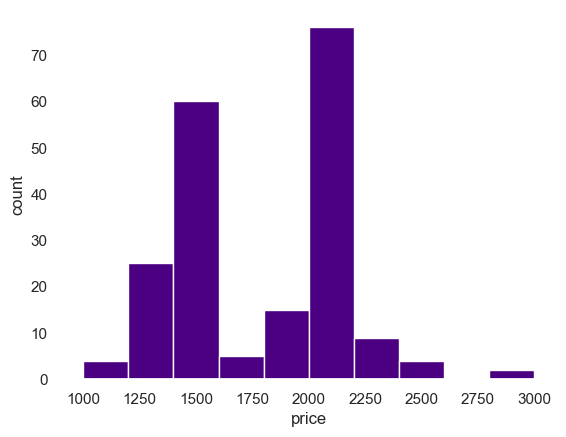

In [19]:
fig, ax = plt.subplots()
ax.hist(df['price'], bins=10, color='indigo')
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_facecolor('white')

`가격` 데이터를 `boxplot`으로도 확인해 봅시다. 요소수의 평균 가격도 알아봅시다.

요소수 가격의 평균은 1738.5원입니다.


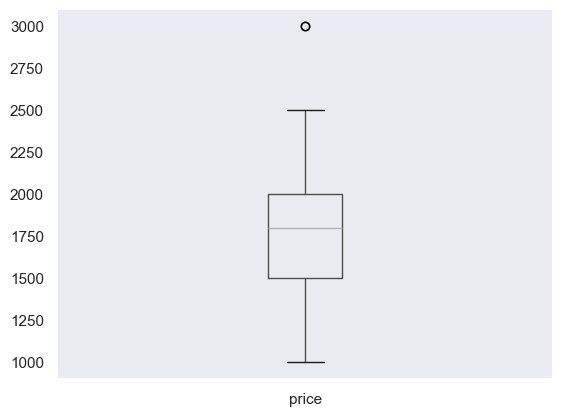

In [20]:
df.boxplot(column='price', grid=False) # boxplot 생성

price_mean = df['price'].mean() # 평균값 계산
print(f"요소수 가격의 평균은 {price_mean:.1f}원입니다.") # 문자열 포맷팅

요소수의 평균 가격은 `1738.5`원인 것을 확인하였습니다.

---

### 3-4. 요소수 가격과 재고의 상관관계 알아보기

이번에는 `scatterplot`을 이용하여 주유소 별 요소수 가격과 재고량 사이에 상관관계가 있는지 알아보겠습니다.

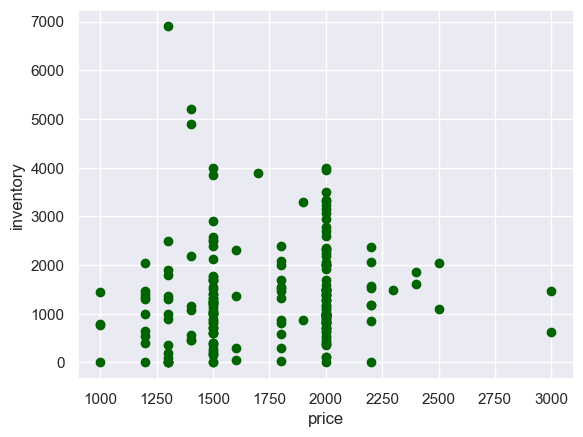

In [21]:
fig, ax = plt.subplots()
# 비교할 두 대상을 입력.
ax.scatter(df['price'], df['inventory'], color='darkgreen')
ax.set_xlabel('price')
ax.set_ylabel('inventory')
plt.show()

이번에는 `pandas`의 `corr` 함수(피어슨 상관계수)를 이용해서 가격과 재고량 사이의 통계적 상관관계를 확인해보겠습니다.

* **피어슨 상관계수란?**

* 두 변수 x와 y사이의 선형 상관 관계를 나타내는 수치. -1~+1까지의 값을 가지며, 0에 가까울 수록 관계가 없다고 볼 수 있다.

In [29]:
corr = df.corr(method="pearson", numeric_only=True)["inventory"][
    "price"
]  # 피어슨 상관계수
print(
    f"가격과 재고량 사이의 피어슨 상관계수는 {corr:.3f}입니다."
)  # 문자열 포맷팅

가격과 재고량 사이의 피어슨 상관계수는 0.099입니다.


관점에 따라 다르겠지만, 충분히 유의미한 선형 상관관계를 보인다고 말하기는 어렵겠습니다.

---

### 3-5. 주유소 이름에서 패턴 찾아보기

지금까지 가격이나 재고량과 같이 분석이 상대적으로 쉬운 변량들을 주로 다뤄봤습니다. <br>
이번에는 주유소의 이름에서 패턴을 추출하는 조금 더 창의적인 분석을 시도해보겠습니다.

분석에 앞서 분석을 도와줄 보조함수를 두 가지 정의하겠습니다. <br>
여러 카테고리에 대해 유사한 분석을 진행할 때 이와 같이 관련 함수를 미리 정의해두면 수고를 줄일 수 있습니다.

In [22]:
# 분석 키워드와 가격 차이를 입력값으로 받아, 전체 평균과 비교해주는 함수를 정의합니다.
def price_insight(keyword, diff):
    if diff > 0:
        print(f"{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {diff:.2f}원 저렴합니다.")
    else:
        print(f"{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {-diff:.2f}원 비쌉니다.")    

In [23]:
# 분석 키워드와 재고량 차이를 입력값으로 받아, 전체 평균과 비교해주는 함수를 정의합니다.
def inven_insight(keyword, diff):
    if diff > 0:
        print(f"{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {diff:.2f}만큼 적습니다.")
    else:
        print(f"{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {-diff:.2f}만큼 많습니다.")    

먼저 휴게소에 속해있는 주유소들을 살펴보겠습니다.

In [24]:
tdf = df[df.name.str.contains('휴게소')]
tdf

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
3,충남 공주시 당진영덕고속도로 72-1,A0000053,YELLOW,791,36.497380,127.168437,공주(대전)휴게소 주유소,NaN,1000,2021-12-28 09:01:09,041-854-9728
4,충남 공주시 의당면 당진영덕고속도로 69,A0000054,YELLOW,762,36.498579,127.165047,공주(당진)휴게소주유소/충전소,NaN,1000,2021-12-28 13:56:33,041-854-9504
180,경기 용인시 처인구 이동면 남북대로 2616,A0007236,GRAY,0,37.140624,127.205600,송전휴게소주유소/충전소,NaN,1500,2021-12-28 14:12:48,031-335-4194


In [33]:
price_diff = df.price.mean() - tdf.price.mean() # 전체 평균과의 요소수 가격 차이
price_insight("휴게소", price_diff)

휴게소 주유소의 요소수 가격은 전체 평균에 비해 208.17원 비쌉니다.


In [34]:
inven_diff = df.inventory.mean() - tdf.inventory.mean() # 전체 평균과의 요소수 가격 차이
inven_insight("휴게소", inven_diff)

휴게소 주유소의 요소수 재고량은 전체 평균에 비해 121.88만큼 많습니다.


일반화하기에는 관측값이 부족하긴 하지만, 휴게소의 주유소들의 경우 요소수 가격은 더 저렴하고 대신 재고량도 부족한 경향이 있는 것 같습니다.

이번에는 "셀프" 주유소들을 살펴보겠습니다.

In [35]:
tdf = df[df.name.str.contains('셀프')]
print(f"셀프 주유소 관측값 수: {tdf.shape[0]}")
tdf.head()

셀프 주유소 관측값 수: 15


,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
40,경기 평택시 경기대로 1078 (장당동),A0002027,YELLOW,800,37.042878,127.062331,동일석유(주) 금성셀프주유소,NaN,1800,2021-12-28 12:55:53,031-665-0190
57,경기 용인시 처인구 백암면 죽양대로 1454,A0002375,YELLOW,370,37.173587,127.347521,백암셀프주유소,NaN,2000,2021-12-28 11:03:51,031-337-2066
64,경기 화성시 우정읍 포승향남로 976,A0002627,GREEN,2241,37.036550,126.806016,(주)소모에너지 우정셀프주유소,NaN,2000,2021-12-28 10:45:28,031-8055-0973
76,경기 평택시 현덕면 서해로 471,A0002967,GREEN,1900,36.942756,126.914171,기산셀프주유소,NaN,1300,2021-12-28 10:31:18,031-684-0099
87,경기 안성시 원곡면 남북대로 1106,A0003290,GREEN,2943,37.037843,127.151106,삼미상사(주) 서안성셀프주유소,NaN,2000,2021-12-28 12:15:28,031-652-5210


In [39]:
price_diff = df.price.mean() - tdf.price.mean() # 전체 평균과의 요소수 가격 차이
price_insight('셀프', price_diff)

셀프 주유소의 요소수 가격은 전체 평균에 비해 208.17원 비쌉니다.


셀프 주유소가 더 저렴할 것이라는 일반적인 인식과는 달리, "요소수 가격" 측면에서는 그런 추세가 관측되지 않는군요.

In [38]:
inven_diff = df.inventory.mean() - tdf.inventory.mean() # 전체 평균과의 요소수 가격 차이
inven_insight('셀프', inven_diff)

셀프 주유소의 요소수 재고량은 전체 평균에 비해 121.88만큼 많습니다.


가격이 더 비싸서인지는 모르겠지만, 재고량은 더 많은 편입니다.

마지막으로 이름에 "알뜰"이 들어간 주유소들이 실제로 더 알뜰할지 살펴보겠습니다.

In [40]:
tdf = df[df.name.str.contains('알뜰')]
print(f"알뜰 주유소 관측값 수: {tdf.shape[0]}")
tdf.head()

알뜰 주유소 관측값 수: 3


,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
20,인천 중구 인중로 180,A0001327,GREEN,1400,37.468916,126.624263,알뜰 부광주유소,"06:00~22:00(평일,토), 08:00~20:00(일)",1200,2021-12-28 10:52:50,032-765-5145
107,경기 여주시 점동면 장여로 931,A0003901,GREEN,1374,37.183854,127.662086,덕평알뜰주유소,NaN,1600,2021-12-28 14:49:44,031-882-7338
140,경기 양주시 부흥로 1300,A0005003,GREEN,3890,37.787343,127.020032,(주)어하둥둥알뜰주유소,NaN,1700,2021-12-28 08:20:54,031-826-5182


In [41]:
price_diff = df.price.mean() - tdf.price.mean() # 전체 평균과의 요소수 가격 차이
price_insight("알뜰", price_diff)

알뜰 주유소의 요소수 가격은 전체 평균에 비해 238.50원 저렴합니다.


역시 관측값이 충분하지는 않지만, 이 데이터에 따르면 알뜰 주유소의 요소수 가격은 평균보다 저렴한 편입니다.

---

## 4. 데이터 시각화하기

### 4-1. 지역별 요소수 재고 현황 지도에 나타내기

folium 라이브러리를 이용하여 요소수 재고 현황을 지도에 표출합니다.

In [42]:
# folium 라이브러리 불러오기

import folium

In [43]:
# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다 
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=10)
map_osm

요소수 재고 현황을 확인하고자 하는 지역을 `target_region`으로 설정합니다.

본 실습에서는 경기도의 요소수 재고 현황을 알아보겠습니다.

In [41]:
# 요소수 유통 주유소를 찾고 싶은 지역을 설정합니다.
target_region = '경기' # 변경 가능

주소에 `target_region`이 포함된 정보를 찾아 Dataframe 형태로 불러옵니다.

In [42]:
df_target_region = df[df['addr'].str.contains(target_region)]
print(f"{target_region}이(가) 포함된 관측값의 갯수 : {len(df_target_region)}")
df_target_region

경기이(가) 포함된 관측값의 갯수 : 150


,addr,code,color,inventory,lat,lng,name,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,2000,2021-12-28 06:06:12,031-215-8053
6,경기 안양시 만안구 엘에스로 237 (안양동),A0000215,GREEN,1610,37.379715,126.938793,마하주유소,2400,2021-12-28 08:33:03,031-444-5175
8,경기 용인시 처인구 이동면 어진로 637,A0000269,GREEN,1000,37.107869,127.178377,남사IC주유소,1500,2021-12-28 10:32:10,031-336-5145
13,경기 파주시 탄현면 새오리로,A0000695,GREEN,1260,37.787836,126.688009,성동IC주유소,1500,2021-12-28 11:04:06,031-944-4651
...,...,...,...,...,...,...,...,...,...,...
190,경기 광주시 곤지암읍 경충대로 41,A0007819,YELLOW,979,37.328131,127.394930,서민행복주유소,2000,2021-12-28 12:01:50,031-761-1775
191,경기 김포시 통진읍 김포대로 2466,A0007889,GREEN,1092,37.698199,126.575722,펜텍주유소,2500,2021-12-28 12:31:17,031-997-5150
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,2000,2021-12-28 09:08:34,031-461-8204
198,경기 의왕시 창말로 39,A0008176,YELLOW,200,37.336115,126.953993,의왕아이시디주유소,1500,2021-12-28 11:13:41,031-461-8005


이제 원하는 지역의 요소수 재고 현황을 시각화 해봅시다.

1. 지도에 표출할 내용은 주유소 명칭, 주소, 재고량, 전화번호입니다.
2. `lat`, `lng` 정보를 이용해 지도 상의 좌표를 가져옵니다.
3. 재고에 따라 지도에 표출할 마커의 색상을 정합니다.
4. `CircleMarker`를 이용해 마커를 생성합니다.

In [43]:
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=9)

for row in df_target_region.values:
    iframe = "<b>    명칭 : </b>" + str(row[6]) + "<br>"
    iframe += "<b>    주소 : </b>" + str(row[0]) + "<br>"
    iframe += "<b>    재고량 : </b>" + str(row[3]) + "<br>"
    iframe += "<b>    가격 : </b>" + str(row[7]) + "<br>"
    iframe += "<b>    전화번호 : </b>" + str(row[8]) + "<br>"
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # 요소수 재고에 따라 지도에 나타낼 마커의 색상을 정합니다.
    color = row[2].upper()
    if color == 'GREEN':
        color_code = '#9ACD32'
    elif color == 'YELLOW':
        color_code = '#FFFF00'
    elif color ==  'RED':
        color_code = '#DC143C'
    elif color == 'GRAY':
        color_code = '#696969'
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([row[4], row[5]],          # 위치
                                 radius=5,              # 범위
                                 color=color_code,      # 색상
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

데이터를 시각화해보니 요소수 재고는 경기도 여러 지역에 골고루 분포되어 있는 것을 확인할 수 있습니다. `GREEN`과 `YELLOW` 마커가 분산되어 있기 때문입니다.

하지만 일부 주유소는 요소수가 매진되었거나 부족한 것으로 보입니다.

---

### 4-2. 재고별 요소수 유통 주유소 지도에 나타내기

다음으로 요소수 재고가 있는 주유소를 찾아봅시다.
재고량을 나타내는 `target_color`를 설정합니다.

In [44]:
# 재고량을 충분으로 설정
target_color = 'GREEN'

In [45]:
df_target_color = df[df['color'].str.contains(target_color)]
df_target_color

,addr,code,color,inventory,lat,lng,name,openTime,price,regDt,tel
0,경기 광명시 오리로 608 (소하동),A0000004,GREEN,1700,37.456201,126.880407,(주)지에스이앤알 직영 하안단지주유소,NaN,2000,2021-12-28 10:23:15,02-899-5202
1,경기 용인시 기흥구 흥덕중앙로 92,A0000012,GREEN,3228,37.275967,127.077150,(주)지에스이앤알 흥덕주유소,NaN,2000,2021-12-28 06:06:12,031-215-8053
5,전북 진안군 진안읍 익산장수고속도로 42-1,A0000057,GREEN,1700,35.774848,127.426593,한화리조트(주)진안(하)주유소,NaN,1500,2021-12-28 01:45:01,063-432-6353
6,경기 안양시 만안구 엘에스로 237 (안양동),A0000215,GREEN,1610,37.379715,126.938793,마하주유소,NaN,2400,2021-12-28 08:33:03,031-444-5175
8,경기 용인시 처인구 이동면 어진로 637,A0000269,GREEN,1000,37.107869,127.178377,남사IC주유소,NaN,1500,2021-12-28 10:32:10,031-336-5145
...,...,...,...,...,...,...,...,...,...,...,...
192,인천 서구 백범로 853 (가좌동),A0007908,GREEN,1000,37.484730,126.663354,(주)보문 가좌주유소,NaN,1200,2021-12-28 11:52:26,032-583-5188
194,인천 서구 중봉대로 372 (원창동),A0007974,GREEN,1756,37.512512,126.649565,서광유업㈜청도3주유소,NaN,1500,2021-12-28 13:45:00,032-577-0001
195,인천 서구 중봉대로 148,A0008072,GREEN,2510,37.492677,126.648296,한밭산업㈜ 청라주유소,NaN,1500,2021-12-28 12:02:05,032-575-5261
197,경기 의왕시 오봉로 182 (부곡동),A0008150,GREEN,1912,37.334862,126.960332,현대오일뱅크(주)직영 의왕셀프주유소,NaN,2000,2021-12-28 09:08:34,031-461-8204


In [46]:
# 전국의 요소수 주유소 재고를 확인하기 위해 중심지 좌표와 지도의 크기를 조절합니다.
map_osm = folium.Map(location=[36.3504, 127.3845], zoom_start=7)

for row in df_target_color.values:
    iframe = "<b>    명칭 : </b>" + str(row[6]) + "<br>"
    iframe += "<b>    주소 : </b>" + str(row[0]) + "<br>"
    iframe += "<b>    재고량 : </b>" + str(row[3]) + "<br>"
    iframe += "<b>    가격 : </b>" + str(row[7]) + "<br>"
    iframe += "<b>    전화번호 : </b>" + str(row[8]) + "<br>"
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([row[4], row[5]],          # 위치
                                 radius=5,              # 범위
                                 color='#9ACD32',       # 색상 (본 실습에서는 재고에 따라 색상을 바꾸지 않아도 괜찮습니다)
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

지도를 보면 요소수 재고는 수도권에 많이 남아있은 것을 알 수 있습니다. 지방에서는 `marker`를 찾기 어렵습니다.

이는 위의 `전화번호` 데이터에서 알아봤듯이 수도권 밖의 지역에 요소수 주유소가 적다는 사실과도 관련이 있습니다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>